In [327]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

class Regression:
    def __init__(self, weights=None, bias=None, lr=0.001, epochs=1000):
        self.weights = weights
        self.bias = bias
        self.epochs = epochs
        self.lr = lr

    
    
    def fit_logistic(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        def sigmoid(x):
            x = np.clip(x, -500, 500)
            return 1 / (1 + np.exp(-x))


        for _ in range(self.epochs):
            preds = np.dot(X, self.weights) + self.bias
            preds = sigmoid(preds)

            dw = (2/n_samples) * np.dot((preds - y), X)
            db = (2/n_samples) * np.sum(preds - y)

            self.weights -= dw * self.lr
            self.bias -= db * self.lr

        return self.weights, self.bias

    def predict_logistic(self, X, decision_boundary=0.5):
        def sigmoid(x):
            x = np.clip(x, -500, 500)
            return 1 / (1 + np.exp(-x))
        
        preds = sigmoid(np.dot(X, self.weights) + self.bias)
        return np.array([0 if x < decision_boundary else 1 for x in preds])
    
    
    
    def fit_regression(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            
            preds = np.dot(X, self.weights) + self.bias
            
            dw = (2/n_samples) * np.dot((preds - y), X)
            db = (2/n_samples) * np.sum(preds - y)

            self.weights -= dw * self.lr
            self.bias -= db * self.lr

        return self.weights, self.bias

    def predict_regression(self, X):
        return np.dot(X, self.weights) + self.bias

    def reg_score(self, preds, y):
        return np.sum(preds - y)**2

            

        

In [329]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=1337)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [331]:
reg = Regression(epochs=1000)
reg.fit_regression(X_train, y_train)

(array([36.99465689]), 0.4012449790905372)

In [333]:
preds = reg.predict_regression(X_test)

In [335]:
reg.reg_score(preds, y_test)

13.991918051682964

In [337]:
import matplotlib.pyplot as plt

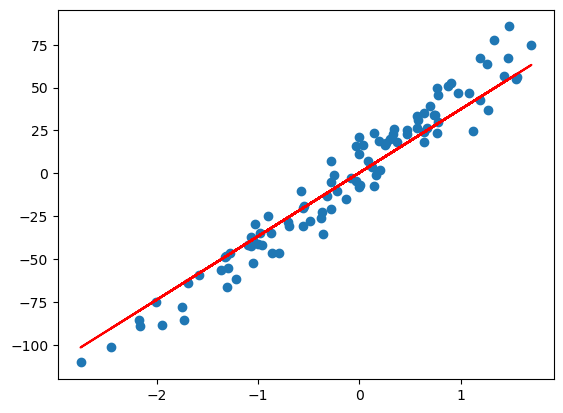

In [339]:
plt.scatter(X,y)
plt.plot(X, reg.predict_regression(X), c='red')

In [341]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [343]:
reg.fit_logistic(X_train, y_train)

(array([ 5.31917443e-01,  6.77234976e-01,  3.04775840e+00,  1.60786419e+00,
         4.66600495e-03, -3.20041616e-03, -1.14905904e-02, -4.86227385e-03,
         9.02566394e-03,  3.89471306e-03,  2.91616764e-03,  4.01291148e-02,
        -1.12616644e-02, -1.23303073e+00,  2.20629730e-04, -1.14059418e-03,
        -1.92011096e-03, -3.03623652e-04,  6.60848994e-04, -7.84843655e-06,
         5.62813973e-01,  8.40314744e-01,  3.03946896e+00, -2.07555847e+00,
         5.78095876e-03, -1.20021067e-02, -2.48432760e-02, -5.82171717e-03,
         1.23153893e-02,  3.53236662e-03]),
 0.07060855162752877)

In [344]:
preds = reg.predict_logistic(X_test)

In [345]:
from sklearn.metrics import classification_report

In [349]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.89      0.96      0.92        68

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114

